# Сокращение размерности пространства признаков (через PCA и Factor Analysis)

## ПРИМЕР С РЫБКАМИ ВИДА STICKLEBACK

### Введение

Данные содержат результаты наблюдений за поведением самцов рыбы stickleback. 
Многие отмечают высокие вкусовые качества колюшки. Теперь настало время отойти от чисто гастрономического подхода и познакомиться поближе с личной жизнью самцов этого вида. 

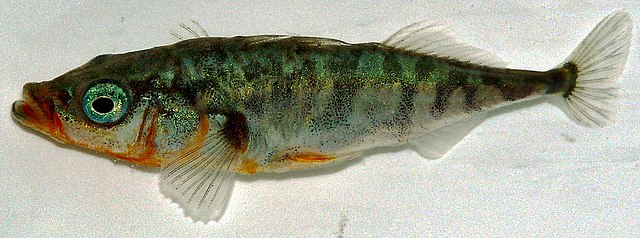

В течение фиксированного интервала времени экспериментатор фиксировал количество разных элементов поведения, включая реакцию на помещенную в аквариум модель самца. Эксперимент проводился над 53 разными самцами. Регистрировались следующие элементы поведения. 

**ИССЛЕДУЕМЫЕ ПРИЗНАКИ:**

*   **LUNGES** – количество нападений (удары) на модель самца.
*   **BITES** – количество нападений (укусы) на модель самца.
*   **ZIGZAGS** – плавание зигзагом, которое является частью поведения, направленного на привлечение самок.
*   **NEST** – действия, связанные с построением гнезда.
*   **SPINES** – число раз, когда топорщился колючий верхний плавник.
*   **DNEST** – суммарная длительность времени, проведенного за 
построением гнезда.
*   **BOUT** – количество элементов поведения, характеризующих готовность 
к схватке.
 

**ИНТЕРЕСНЫЙ ФАКТ**

---
**Колюшковые (лат. Gasterosteidae)** — семейство лучепёрых рыб из отряда скорпенообразных, насчитывающее 5 родов и от 8 до 18 видов. У всех представителей имеются колючки перед спинным плавником, брюшной плавник отсутствует у многих видов или представлен одной колючкой и одним или двумя мягкими лучами, брюшной щит образован срастанием тазовых костей, чешуя отсутствует. 

При нападении хищника *колюшки растопыривают свои острые спинные и брюшные шипы, обыкновенно плотно прилегающие к телу, и иглы эти вонзаются в пасть хищника*. Так же *взъерошиваются они и в драках между собой (что случается очень часто) и вообще в минуту опасности*.

В семействе представлены морские, солоноватоводные и пресноводные виды. Колюшки очень прожорливы. В прудах, куда они проникают, трудно развести какую-либо другую рыбу. При ловле на удочку легко заглатывают насадку, даже пустой крючок.

---

###  Предварительный анализ

Загружаем данные и отображаем их такими, какие они есть

In [104]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#stickleback_dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/PRACTICE/STICKLEBACK/stickleback.xlsx')
stickleback_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PRACTICE/STICKLEBACK/stickleback.csv', sep=';', decimal=',')
stickleback_dataset.head()
#print(stickleback_dataset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Отбрасываем столбцы, состоящие из пропусков

In [105]:
stickleback_dataset = stickleback_dataset.filter(regex='^(?!.*Unnamed).*$')
stickleback_dataset.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0


Описательная статистика даёт не очень хорошие результаты

In [106]:
stickleback_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
LUNGES,54.0,131.185185,50.771064,41.0,99.00,127.0,156.75,277.0
BITES,54.0,69.055556,43.428283,3.0,34.25,60.0,84.25,175.0
ZIGZAGS,54.0,7.277778,6.693891,0.0,2.25,5.0,10.75,26.0
NEST,54.0,1.425926,3.000641,0.0,0.00,0.0,1.00,15.0
SPINES,54.0,18.425926,8.712606,5.0,14.00,16.0,24.75,46.0
DNEST,54.0,34.259259,56.491170,0.0,0.00,0.0,73.00,199.0
BOUT,54.0,89.314815,98.679742,6.0,23.50,45.0,125.00,306.0


Отображаем коэффициенты корреляции (через тепловую карту)

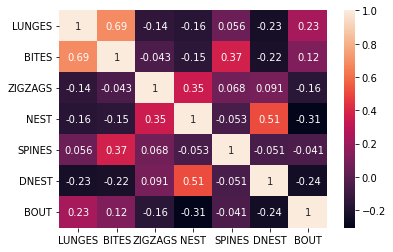

In [107]:
sns.heatmap(stickleback_dataset.corr(), annot=True)

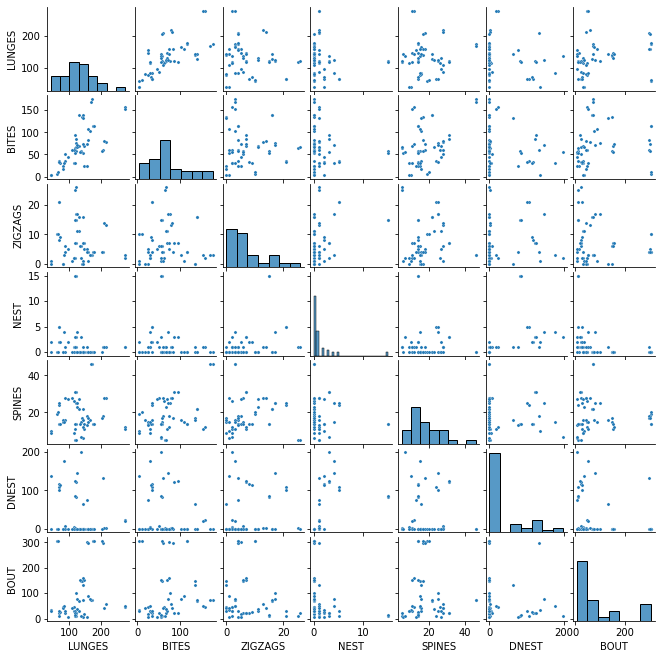

In [108]:
#data_stickleback = stickleback_dataset[['LUNGES', 'BITES', 'ZIGZAGS', 'NEST', 'SPINES', 'DNEST', 'BOUT']]
g = sns.pairplot(stickleback_dataset, plot_kws={"s": 10})
g.fig.set_size_inches(9, 9)
plt.show()

*Вывод лектора: перспективы мрачные... Ну уж очень много выбросов. Поэтому необходимо стандартизировать данные*

### Стандартизация данных

Функция для стандартизации данных

In [109]:
import math
from sklearn import preprocessing

def scale_feature(df):
  scaled = preprocessing.StandardScaler().fit_transform(df)
  scaled = pd.DataFrame(scaled, columns=df.columns)
  return scaled

In [110]:
df_scaled = preprocessing.scale(stickleback_dataset)

### Principal Component Analysis (PCA)

Попробуем через метод главных компонент спроецировать данные на двумерную плоскость. То есть выделим две главные компоненты. Реализация метода содержится в классе `PCA` библиотеки `sklearn.decomposition`.

In [112]:
from sklearn.decomposition import PCA

**Откуда взялось число 3?** Это может быть только в примере. На самом деле нужно выводить все факторы и искать среди них подходяще количество. После уже сокращать


In [113]:
pca = PCA(n_components=3) # очень распространено у студентов n_components=.9
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.32687739 0.20774873 0.13987346]


Какую долю от общего разброса данных объясняют первые факторы? 32%, 20% и ~14% (по крайней мере, эти 3 фактора все годятся).

Координаты самих компонент находятся в атрибуте `components_`. Число компонентов нельзя просто так выбирать

In [114]:
print(pca.components_)

[[-0.47012791 -0.45897962  0.24811772  0.43535559 -0.16394905  0.42179779
  -0.33530269]
 [ 0.31046609  0.50737164  0.37893225  0.40026456  0.46520814  0.22423164
  -0.2751091 ]
 [ 0.48163265  0.12992711 -0.24381636  0.32733909 -0.62180282  0.39879993
   0.1971586 ]]


In [115]:
print('Explained varience by component: ', pca.explained_variance_ratio_)

Explained varience by component:  [0.32687739 0.20774873 0.13987346]


In [116]:
pca.singular_values_

array([11.11573903,  8.86166018,  7.27132493])

In [117]:
pca.explained_variance_ratio_

array([0.32687739, 0.20774873, 0.13987346])

Далее создаём массив `zzz`, где будут храниться посчитанные значения этих факторов.

In [118]:
zzz = pca.transform(df_scaled)
zzz

array([[ 0.43548142, -1.64669341, -0.60887645],
       [-0.57810499, -0.85271451,  0.02370697],
       [ 0.4734641 , -1.3749152 ,  0.22311247],
       [-0.86464136,  1.23027304, -0.82995958],
       [ 3.21866694,  2.24827324,  1.56734852],
       [-1.052399  ,  1.38648517, -0.38617423],
       [-2.61590674,  2.46582659, -1.54282384],
       [ 1.04929916,  0.20661276, -0.24291867],
       [-2.13223362, -0.55315166,  1.01988416],
       [ 2.02009165, -0.41143077,  0.09088797],
       [ 0.36063068, -0.02476881, -1.49515   ],
       [ 0.97948675,  0.25108044, -0.24965378],
       [-2.16370354, -0.53744841,  1.0506272 ],
       [ 0.10543508, -0.91355441, -0.12802207],
       [ 2.725405  ,  1.28942123, -0.86645388],
       [ 0.4548321 , -1.16706377, -0.77057737],
       [ 0.48999679, -1.66916561, -0.68995618],
       [ 0.38071857, -1.26181777,  0.07724223],
       [-2.37858607,  1.3058442 ,  2.10630527],
       [-1.68529819, -0.16401596,  0.3660187 ],
       [ 2.02265315, -0.38262677,  0.066

In [119]:
import plotly.express as px
import matplotlib.pyplot as plt


fig = plt.figure()
colors = ['red', 'blue']

fig = px.scatter_3d(zzz, x=zzz[:,0], y=zzz[:,1], z=zzz[:,2])


fig.update_layout(scene = dict(
                    xaxis_title='Factor_1',
                    yaxis_title='Factor_2',
                    zaxis_title='Factor_3'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

<Figure size 432x288 with 0 Axes>

### Factor Analysis (FA)

Теперь тоже самое, но для факторного анализа

In [120]:
from sklearn.decomposition import FactorAnalysis

In [121]:
fa = FactorAnalysis(n_components=2)
fa.fit(df_scaled)

FactorAnalysis(n_components=2)

*Далее мы видим табличку, благодаря которой факторный анализ преобрёл звание "плохой статистики"*

In [122]:
pd.DataFrame(fa.components_, columns=stickleback_dataset.columns)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,0.715035,0.956805,-0.086423,-0.241141,0.358615,-0.282219,0.166892
1,-0.019296,0.098533,0.367721,0.848657,0.073328,0.513705,-0.329849


Видим, что первый фактор сильно коррелирует с фичами-нападениями (ударами и укусами), так что его можно интерпретировать как агрессивность самца. Второй же фактор, напротив, коррелирует с фичами, связанными с обустройством гнезда, что можно расценивать как "домовитость". То есть мы свели пространство из 7 фич к 2 новым интерпретируемым фичам. 

Первый фактор (Factor_1) – агрессивность (соединение Lunges, Bites, Spines)

Второй фактор (Factor_2) – домовитость (соединение Zigzags, Nest, Dnest)

---
Уникальность фич в смысле дисперсии остатков, объяснённой факторами (чем больше, тем хуже объясняется факторами) содержится в атрибуте `noise_variance_`.


In [123]:
print('Уникальность: ')
pd.Series(fa.noise_variance_, stickleback_dataset.columns)

Уникальность: 


LUNGES     0.487766
BITES      0.076163
ZIGZAGS    0.857251
NEST       0.222906
SPINES     0.866169
DNEST      0.656093
BOUT       0.863093
dtype: float64

Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод `transform`.

In [124]:
scores = pd.DataFrame(fa.transform(df_scaled), columns = ["Factor_1", "Factor_2"])
scores.head()

,Factor_1,Factor_2
0,-0.938788,-0.776068
1,-0.159453,-0.591389
2,-0.818776,-0.458188
3,1.444012,0.094633
4,-0.638620,3.662073


In [125]:
scores

,Factor_1,Factor_2
0,-0.938788,-0.776068
1,-0.159453,-0.591389
2,-0.818776,-0.458188
3,1.444012,0.094633
4,-0.638620,3.662073
5,0.397292,-0.037810
6,2.342290,0.179116
7,-0.151254,0.045436
8,1.072923,-0.406284
9,-0.908872,0.227997


No handles with labels found to put in legend.


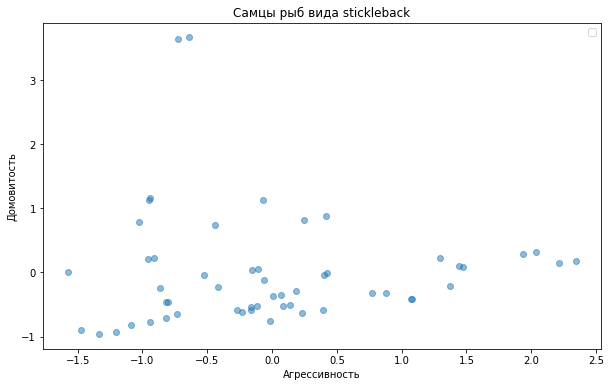

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(scores["Factor_1"], scores["Factor_2"], alpha=0.5, cmap='viridis')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Самцы рыб вида stickleback")
plt.xlabel('Агрессивность')
plt.ylabel('Домовитость')
plt.show()

## РАК МОЛОЧНОЙ ЖЕЛЕЗЫ В ШТАТЕ ВИСКОНСИН

### Введение

Рак молочной железы (БК [Breast Cancer]) является одним из наиболее распространенных видов рака среди женщин во всем мире, представляя большинство новых случаев заболевания раком и связанных с раком смертей в соответствии с глобальной статистикой, что делает его существенной проблемой общественного здравоохранения в современном обществе.

Ранняя диагностика БК может значительно улучшить прогноз и шансы на выживание, поскольку это может способствовать своевременному клиническому лечению пациентов. Дальнейшая точная классификация доброкачественных опухолей может предотвратить пациентов, подвергающихся ненужному лечению. Таким образом, правильный диагноз БК и классификация пациентов по злокачественным или доброкачественным группам является предметом многих исследований. Благодаря своим уникальным преимуществам в обнаружении критических признаков из сложных наборов данных BC, машинное обучение (ML) широко признано в качестве методологии выбора в классификации шаблонов BC и прогнозировании.

Методы классификации и интеллектуального анализа данных являются эффективным способом классификации данных. Особенно в области медицины, где эти методы широко используются в диагностике и анализе для принятия решений.





---



**10 действительных признаков вычисляются для каждого ядра клетки:**
*   радиус (среднее расстояние от центра до точек по периметру)
*   текстура (стандартное отклонение значений оттенков серого)
*   периметр
*   площадь
*   гладкость (локальное изменение длины радиуса)
*   компактность (периметр² / площадь - 1,0)
*   вогнутость (выраженность вогнутых участков контура)
*   вогнутые точки (количество вогнутых частей контура)
*   симметрия
*   фрактальная размерность («приближение береговой линии» - 1)

**Каждый из этих 10 признаков делится ещё на 3:**
*   Среднее значение `(mean)`
*   Стандартная ошибка `(se)`
*   «Наихудшее» или наибольшее (среднее из трех самых больших значений) `(worst)`

*В итоге имеем 30 признаков. *

Например, среди столбцов: признак 3 - средний радиус, признак 13 - радиус стандартной ошибки (SE), признак 23 - наихудший радиус.

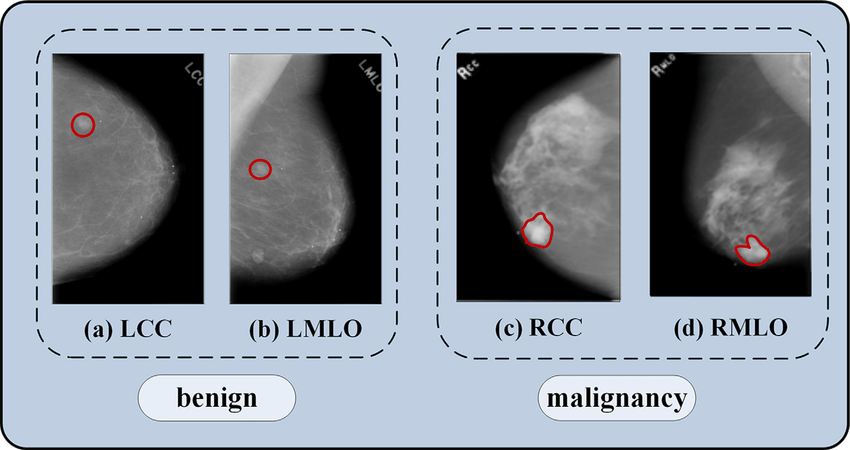

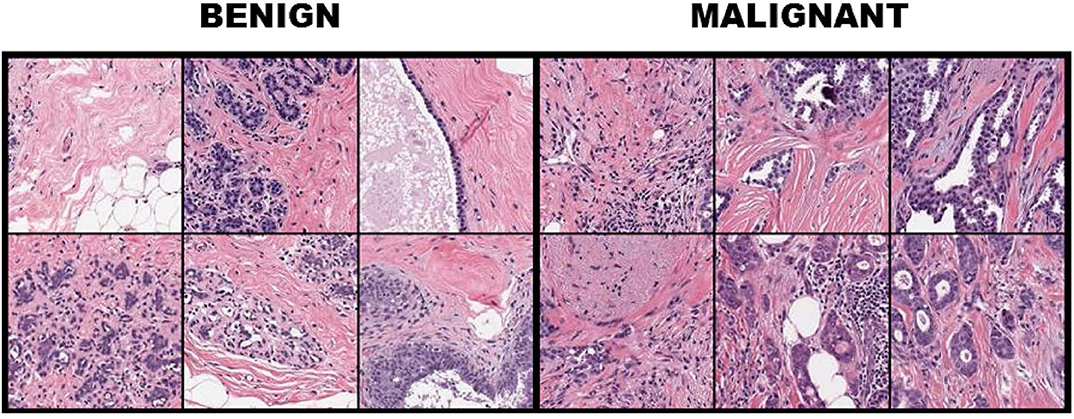

### Предварительный анализ

Загружаем данные и отображаем их такими, какие они есть

In [128]:
from google.colab import drive
drive.mount('/content/drive')

import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

df_BCW = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PRACTICE/BREAST_CANCER_WISCONSIN/data.csv', low_memory=False)
df_BCW

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [129]:
Class = df_BCW['diagnosis']

In [130]:
np.unique(Class)

array(['B', 'M'], dtype=object)

*   B – Benign – Доброкачественная опухоль
*   M – Malignant – Злокачественная опухоль 

---

Отбрасываем столбцы, состоящие из пропусков

In [131]:
df_BCW = df_BCW.filter(regex='^(?!.*Unnamed).*$')
df_BCW.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Убираем столбец с диагнозами (M, B)

In [132]:
df_BCW = df_BCW[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
df_BCW.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Описательная статистика говорит о том, что есть выбросы (если сравнить столбец с максимальным значениями (max) и столбец со средними значениями (mean)).

Следовательно, нужно будет провести стандартизацю данных (см. ниже)


In [133]:
df_BCW.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Отображаем коэффициенты корреляции (через тепловую карту)

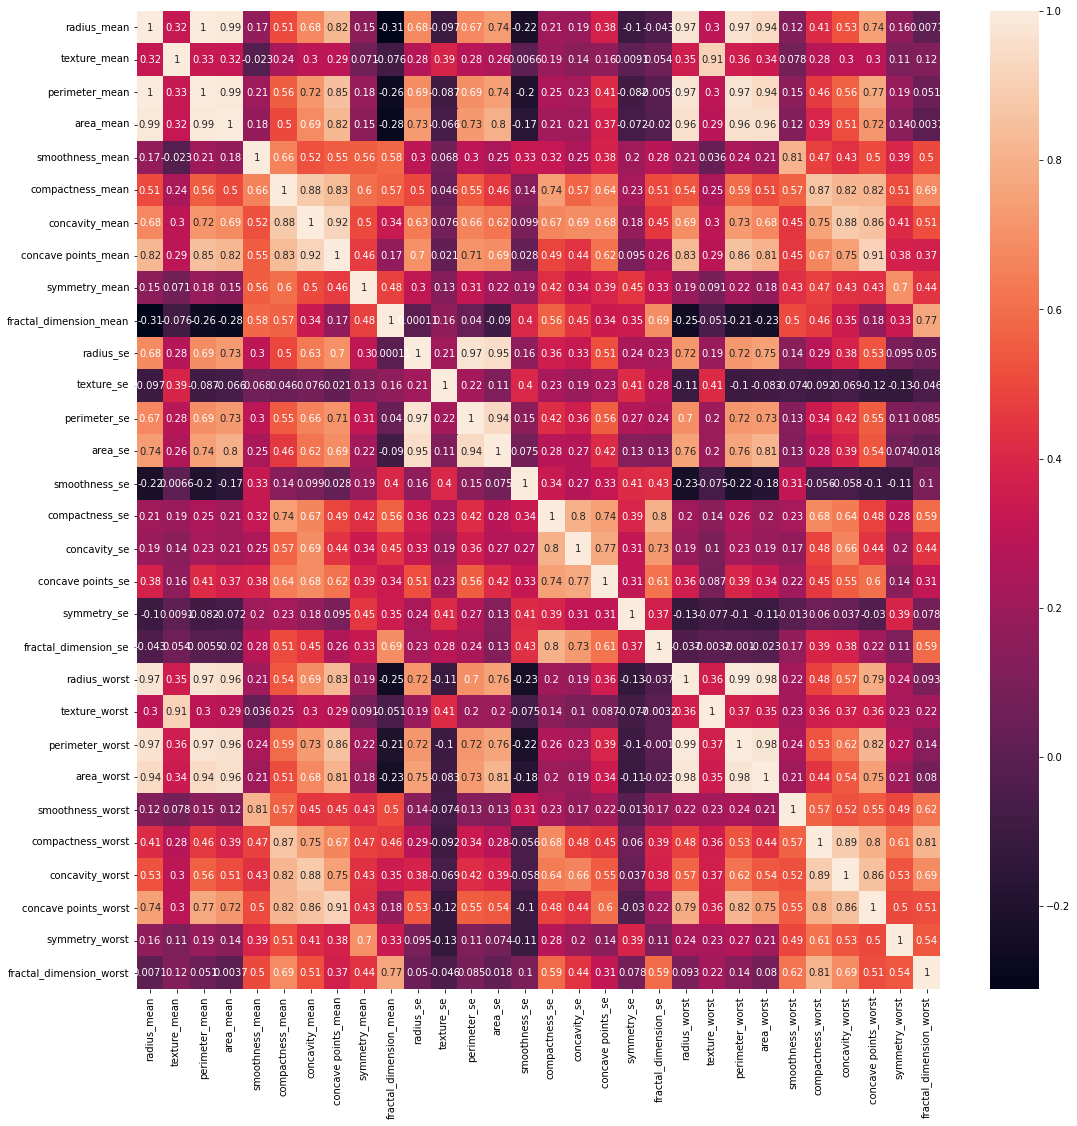

In [134]:
plt.figure(figsize = (18, 18))

ax = sns.heatmap(df_BCW.corr(), annot=True)

Если посмотреть на данные, то можно заметить хорошую корреляцию (от 0.7 до 0.99) и не очень (стремится к 0)

Судя по таблице корреляции всего можно попробовать собрать 3 фактора:


*   mean
*   se
*   worst

Но это не точно...



In [135]:
#sns.pairplot(df_BCW, plot_kws={"s": 7})

### Стандартизация данных

In [136]:
df_scaled = preprocessing.scale(df_BCW)

### Principal Component Analysis (PCA)

Попробуем через метод главных компонент спроецировать данные на двумерную плоскость. То есть выделим две главные компоненты. Реализация метода содержится в классе `PCA` библиотеки `sklearn.decomposition`.

In [137]:
from sklearn.decomposition import PCA

**Откуда взялось число 3?** Это может быть только в примере. На самом деле нужно выводить все факторы и искать среди них подходяще количество. После уже сокращать


In [166]:
pca = PCA(n_components=0.7) # очень распространено у студентов n_components=0.9
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]


Какую долю от общего разброса данных объясняют первые факторы? 44%, ~19% и 9% (по крайней мере, эти 3 фактора все годятся, так как они описывают больше 50% данных).

Координаты самих компонент находятся в атрибуте `components_`. Число компонентов нельзя просто так выбирать

In [167]:
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]
 [-0.00853124  0.0645499  -0.00931422  0.02869953 -0.1042919  -0.07409157
   0.00273384 -0.02556354 -0.04023994 -0.02257409  0.26848139  0.37463367
   0.26664537  0.21600653  0.30883898  0.15477972  0.17646374  0.22465757
   0.28858429  0.21150376 -0.04750699

In [168]:
print('Explained varience by component: ', pca.explained_variance_ratio_)

Explained varience by component:  [0.44272026 0.18971182 0.09393163]


In [169]:
pca.singular_values_

array([86.93235745, 56.90677266, 40.04263937])

In [170]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163])

Далее создаём массив `zzz`, где будут храниться посчитанные значения этих факторов.

In [171]:
zzz = pca.transform(df_scaled)
zzz

array([[ 9.19283683,  1.94858307, -1.12316616],
       [ 2.3878018 , -3.76817174, -0.52929269],
       [ 5.73389628, -1.0751738 , -0.55174759],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053],
       [10.37479406,  1.67201011, -1.87702933],
       [-5.4752433 , -0.67063679,  1.49044308]])

In [172]:
import plotly.express as px
import matplotlib.pyplot as plt


fig = plt.figure()
fig = px.scatter_3d(zzz, x=zzz[:,0], y=zzz[:,1], z=zzz[:,2], color=Class)
fig.update_layout(scene = dict(
                    xaxis_title='Factor_1',
                    yaxis_title='Factor_2',
                    zaxis_title='Factor_3'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

<Figure size 432x288 with 0 Axes>

### Factor Analysis (FA)

Теперь тоже самое, но для факторного анализа

In [145]:
from sklearn.decomposition import FactorAnalysis

In [174]:
fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)

FactorAnalysis(n_components=3)

*Далее мы видим табличку, благодаря которой факторный анализ преобрёл звание "плохой статистики"*

In [147]:
pd.DataFrame(fa.components_, columns=df_BCW.columns).T

,0,1,2
radius_mean,0.963907,-0.144966,0.044340
texture_mean,0.357097,0.019635,-0.053070
perimeter_mean,0.970239,-0.105509,0.002981
area_mean,0.966495,-0.073237,0.095381
smoothness_mean,0.265279,0.400378,-0.450064
compactness_mean,0.603395,0.406596,-0.628081
concavity_mean,0.750804,0.351738,-0.459300
concave points_mean,0.872317,0.210743,-0.314013
symmetry_mean,0.241869,0.419032,-0.406005
fractal_dimension_mean,-0.177875,0.599976,-0.622562


**Разделение данных на 3 фактора:**


---
1.   **Фактор_1**
*   радиус_mean
*   текстура_mean
*   периметр_mean
*   площидь_mean
*   вогнутость_mean
*   вогнутые_точки_mean
*   радиус_se
*   периметр_se
*   площадь_se
*   радиус_worst
*   текстура_worst
*   периметр_worst
*   площадь_worst
*   вогнутые_точки_worst
---
2.   **Фактор_2**
*   симметрия_mean
*   текстура_se
*   гладкость_se
*   компактность_se
*   вогнутость_se
*   вогнутые_точки_se
*   симметрия_se
*   фрактальная_размерность_se
---
3.   **Фактор_3**
*   гладкость_mean
*   компактность_mean
*   фрактальная_размерность_mean
*   гладкость_worst
*   компактность_worst
*   вогнутость_worst
*   симметрия_worst
*   фрактальная_размерность_worst



***ВЫВОД:***  разделение на 3 фрактала произошло примерно так, как и предполагалось, но с небольшой погрешностью.

---
Уникальность фич в смысле дисперсии остатков, объяснённой факторами (чем больше, тем хуже объясняется факторами) содержится в атрибуте `noise_variance_`.


In [148]:
print('Уникальность: ')
pd.Series(fa.noise_variance_, df_BCW.columns)

Уникальность: 


radius_mean                0.047864
texture_mean               0.869285
perimeter_mean             0.047458
area_mean                  0.051388
smoothness_mean            0.566735
compactness_mean           0.076116
concavity_mean             0.101621
concave points_mean        0.096035
symmetry_mean              0.601058
fractal_dimension_mean     0.220739
radius_se                  0.020476
texture_se                 0.797743
perimeter_se               0.033881
area_se                    0.066684
smoothness_se              0.660980
compactness_se             0.333223
concavity_se               0.500877
concave points_se          0.462064
symmetry_se                0.681139
fractal_dimension_se       0.469079
radius_worst               0.004919
texture_worst              0.845245
perimeter_worst            0.005046
area_worst                 0.028511
smoothness_worst           0.599305
compactness_worst          0.147806
concavity_worst            0.155952
concave points_worst       0

Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод `transform`.

In [149]:
scores = pd.DataFrame(fa.transform(df_scaled), columns = ["Factor_1", "Factor_2", "Factor_3"])
#scores = pd.DataFrame(fa.transform(df_scaled), columns = ["Factor_1", "Factor_2"])
scores.head()

,Factor_1,Factor_2,Factor_3
0,2.202306,2.067066,-1.085925
1,1.528908,-1.649734,0.651323
2,1.491898,0.076770,-0.361342
3,-0.084412,2.435679,-3.747495
4,1.390178,0.151012,0.525857


In [150]:
scores

,Factor_1,Factor_2,Factor_3
0,2.202306,2.067066,-1.085925
1,1.528908,-1.649734,0.651323
2,1.491898,0.076770,-0.361342
3,-0.084412,2.435679,-3.747495
4,1.390178,0.151012,0.525857
...,...,...,...
564,2.039237,1.151839,1.470123
565,1.488784,-0.287264,1.003096
566,0.530306,-0.465822,0.143299
567,2.142755,0.460156,-2.500669


In [152]:
import plotly.express as px
import matplotlib.pyplot as plt


fig = plt.figure()
fig = px.scatter_3d(scores, x=scores["Factor_1"], y=scores["Factor_2"], z=scores["Factor_3"], color=Class)
fig.update_layout(scene = dict(
                    xaxis_title='Factor_1',
                    yaxis_title='Factor_2',
                    zaxis_title='Factor_3'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

<Figure size 432x288 with 0 Axes>

*   B – Benign – Доброкачественная опухоль
*   M – Malignant – Злокачественная опухоль 

---

> Если всего 2 фактора


In [153]:
# plt.figure(figsize=(10, 6))
# plt.scatter(scores["Factor_1"], scores["Factor_2"], alpha=0.5, c=Class, cmap='viridis')
# plt.legend(loc="best", shadow=False, scatterpoints=1)
# plt.title("Самцы рыб вида stickleback")
# plt.xlabel('Factor_1')
# plt.ylabel('Factor_2')
# plt.show()